In [24]:
!apt-get install -y poppler-utils
!pip install reportlab pdf2image Pillow

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.5 [186 kB]
Fetched 186 kB in 1s (361 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 123614 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.5_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.5) ...
Setting up poppler-utils (22.02.0-2ubuntu0.5) ...
Processing triggers for man-db (2.10.2-1) ...


Dropdown(description='Ukuran Halaman:', options=(('A4', (595.2755905511812, 841.8897637795277)), ('F4', (595.4…

Button(description='Buat PDF', style=ButtonStyle())

PDF berhasil dibuat dengan ukuran halaman: (595.2755905511812, 841.8897637795277)


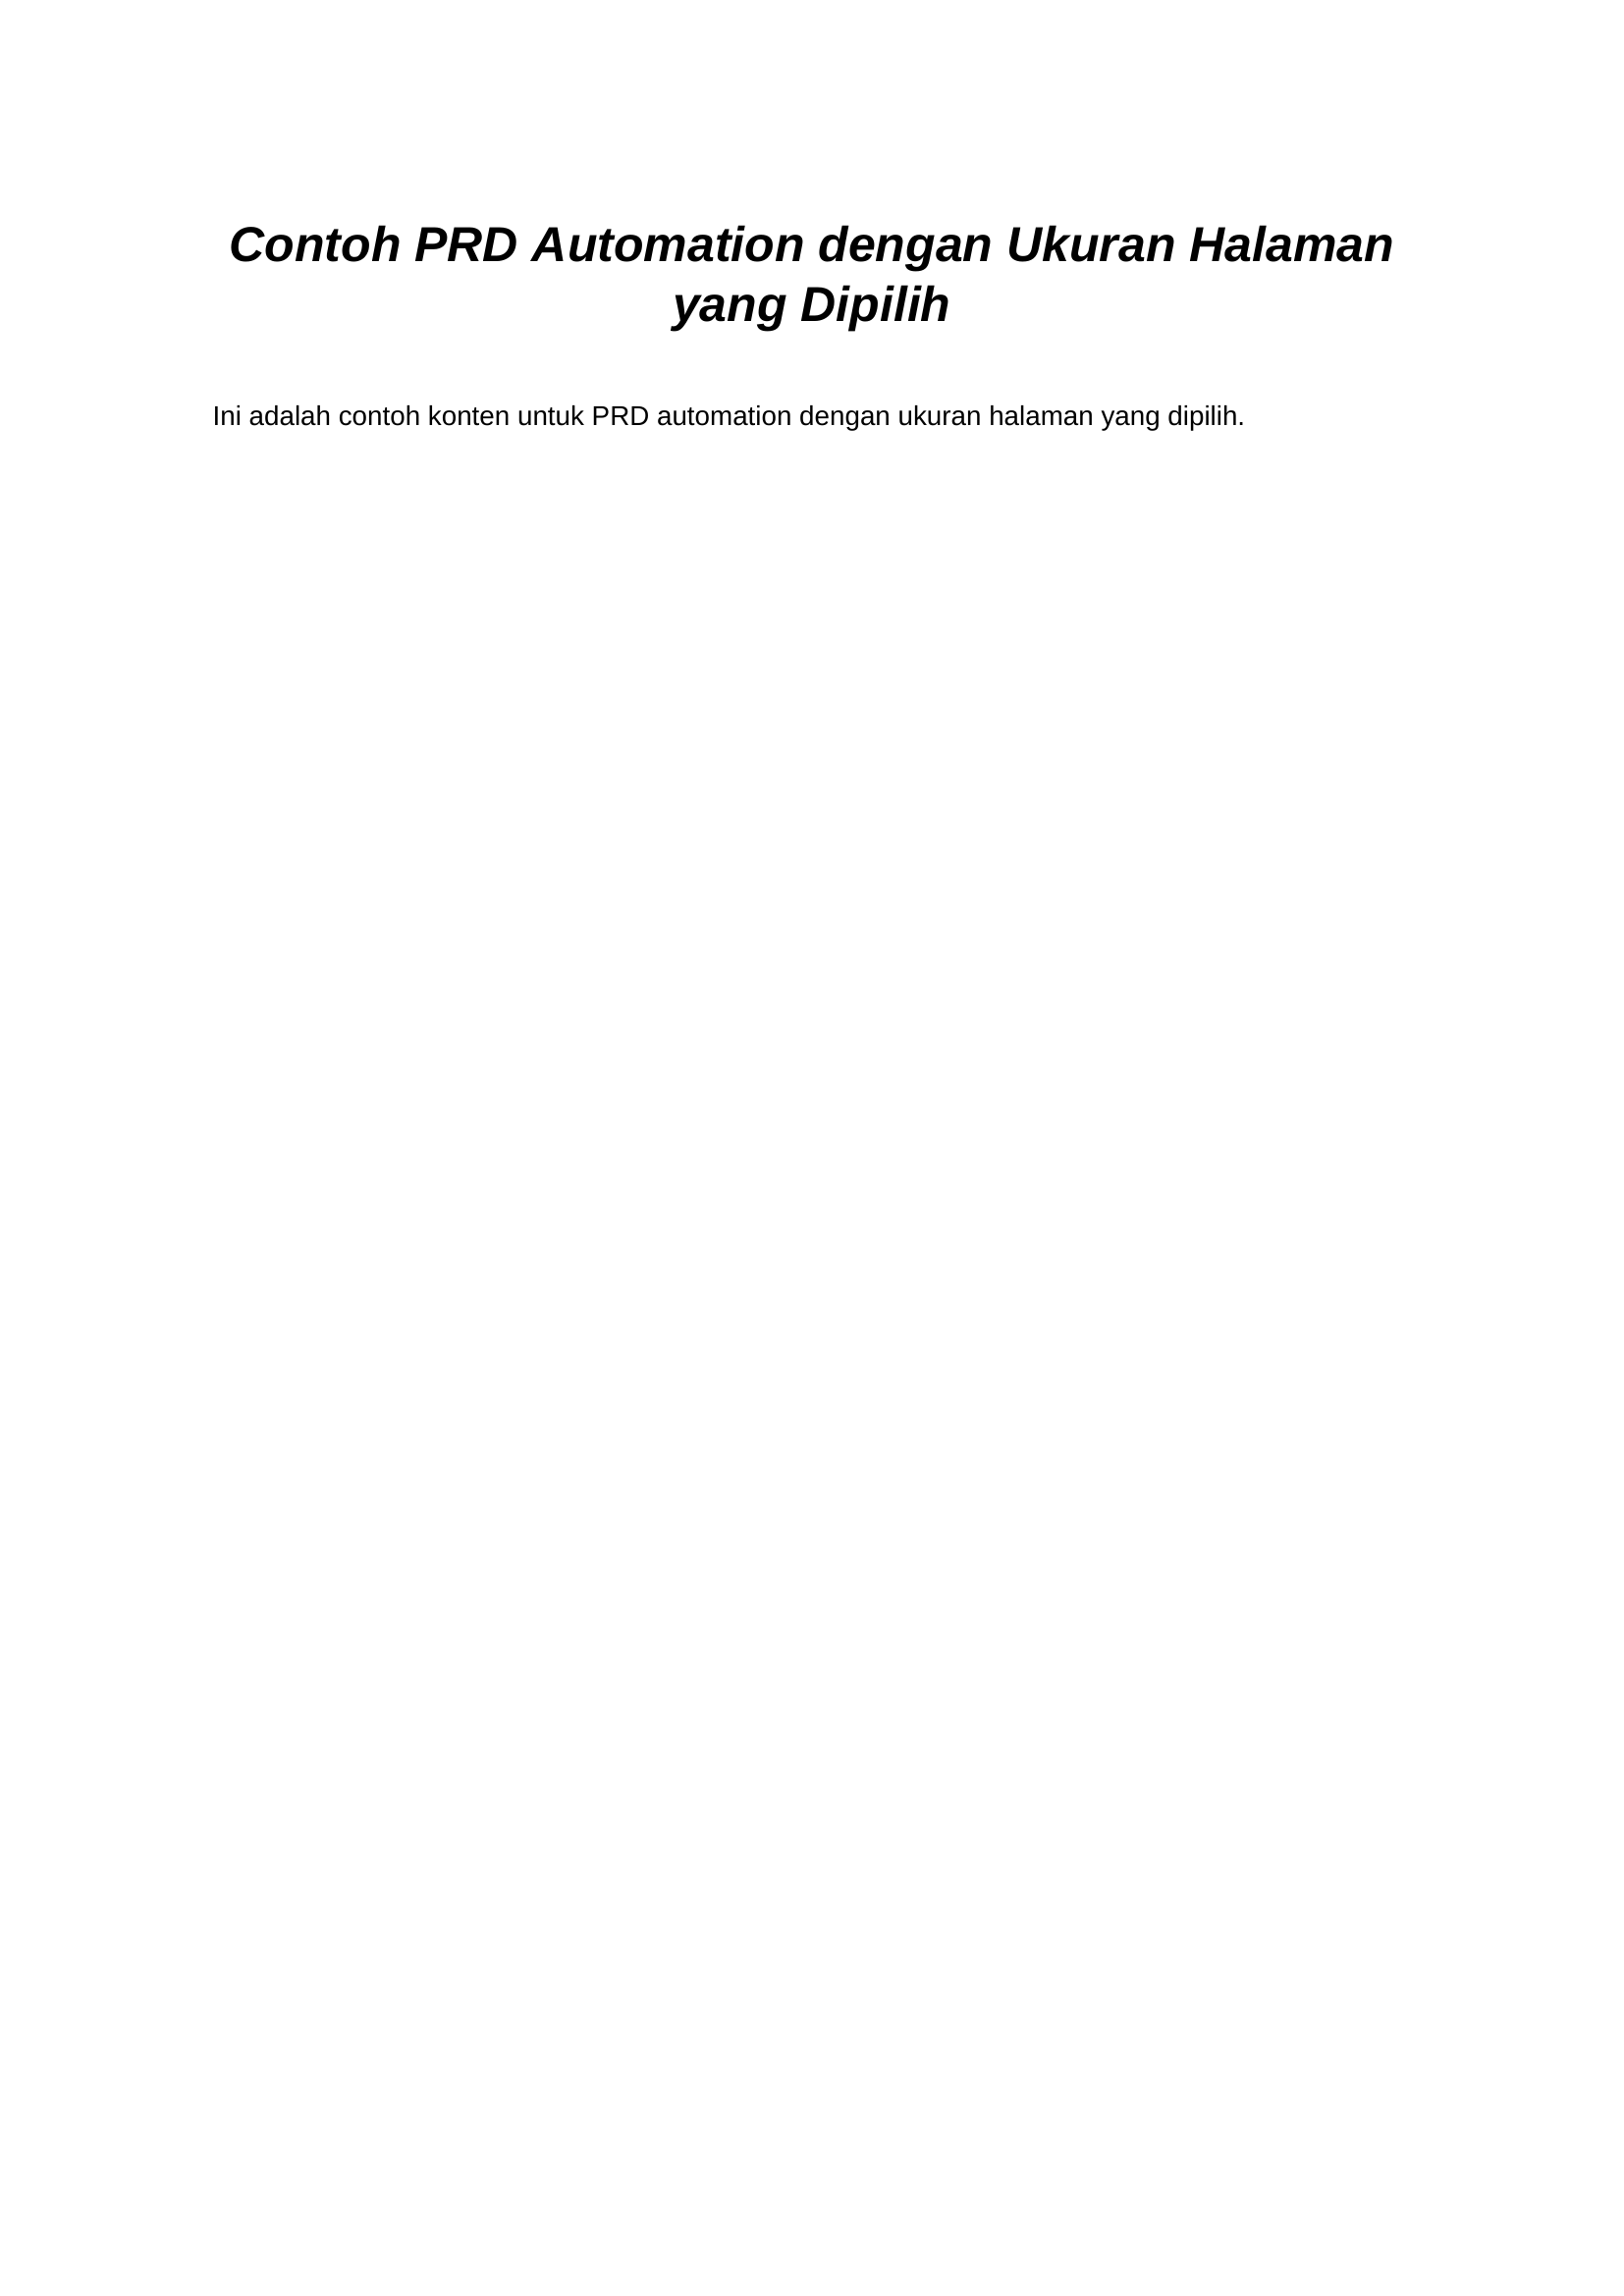

In [26]:
from reportlab.lib.pagesizes import A4, LETTER
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer
import ipywidgets as widgets
from IPython.display import display, clear_output, Image
from pdf2image import convert_from_path

# Mendefinisikan ukuran halaman F4 (210 x 330 mm)
FOLIO = (8.27 * 72, 13 * 72)  # Ukuran dalam points (1 inci = 72 points)

# Fungsi untuk menghasilkan PDF berdasarkan ukuran halaman yang dipilih
def generate_pdf(page_size):
    pdf_filename = "contoh_prd_colab.pdf"
    doc = SimpleDocTemplate(pdf_filename, pagesize=page_size)
    elements = []
    styles = getSampleStyleSheet()

    # Menambahkan judul
    title = Paragraph("<b><i>Contoh PRD Automation dengan Ukuran Halaman yang Dipilih</i></b>", styles['Title'])
    elements.append(title)
    elements.append(Spacer(1, 12))

    # Menambahkan konten
    content = Paragraph("Ini adalah contoh konten untuk PRD automation dengan ukuran halaman yang dipilih.", styles['BodyText'])
    elements.append(content)

    # Menyusun dokumen
    doc.build(elements)
    print("PDF berhasil dibuat dengan ukuran halaman:", page_size)

    # Mengonversi PDF menjadi gambar dan menampilkan preview
    images = convert_from_path(pdf_filename)

    # Menampilkan gambar (halaman pertama) sebagai preview
    if images:
        images[0].save('preview_image.png', 'PNG')
        display(Image('preview_image.png'))

# Membuat dropdown untuk pemilihan ukuran halaman
page_size_dropdown = widgets.Dropdown(
    options=[('A4', A4), ('F4', FOLIO), ('Letter', LETTER)],
    description='Ukuran Halaman:',
)

# Tombol untuk membuat PDF
generate_button = widgets.Button(description='Buat PDF')

# Fungsi untuk menangani tombol klik
def on_button_click(b):
    clear_output()
    display(page_size_dropdown, generate_button)
    generate_pdf(page_size_dropdown.value)

# Menyambungkan tombol dengan fungsi
generate_button.on_click(on_button_click)

# Menampilkan dropdown dan tombol
display(page_size_dropdown, generate_button)